# Creator-> Sarthak Arora

In [ ]:
#Task-6->Prediction By Decision Tree Algorithm.

# Dataset link-> http://localhost:8888/edit/LGMVIP/Intermediate/TASK-6/Iris.csv

In [22]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [2]:
pip install confusion_matrix

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ------------------------------------ 154.7/154.7 kB 617.5 kB/s eta 0:00:00
  Created wheel for confusion_matrix: filename=confusion_matrix-0.1-py3-none-any.whl size=2408 sha256=9ca35323eee97e13d726c3e510a7162bb4dfb7ebebe1b140233b16f0fa063a9d
  Stored in directory: c:\users\saart\appdata\local\pip\cache\wheels\10\88\de\972b4c04d883c3094e4ae8e1c98f51c364d8d2eee5bc20afc2
Successfully built confusion_matrix
Note: you may need to restart the kernel to use updated packages.


In [9]:
!pip install scikit-learn

In [10]:
!pip install matplotlib

In [18]:
daart=pd.read_csv("Iris.csv")
daart.head(14)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [19]:
daart.sample(12)
daart.shape
daart.columns
daart.info()
daart.describe()
daart.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [20]:
daart['Species'].unique()
daart['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# Visualizing the data

<Axes: xlabel='SepalWidthCm', ylabel='PetalWidthCm'>

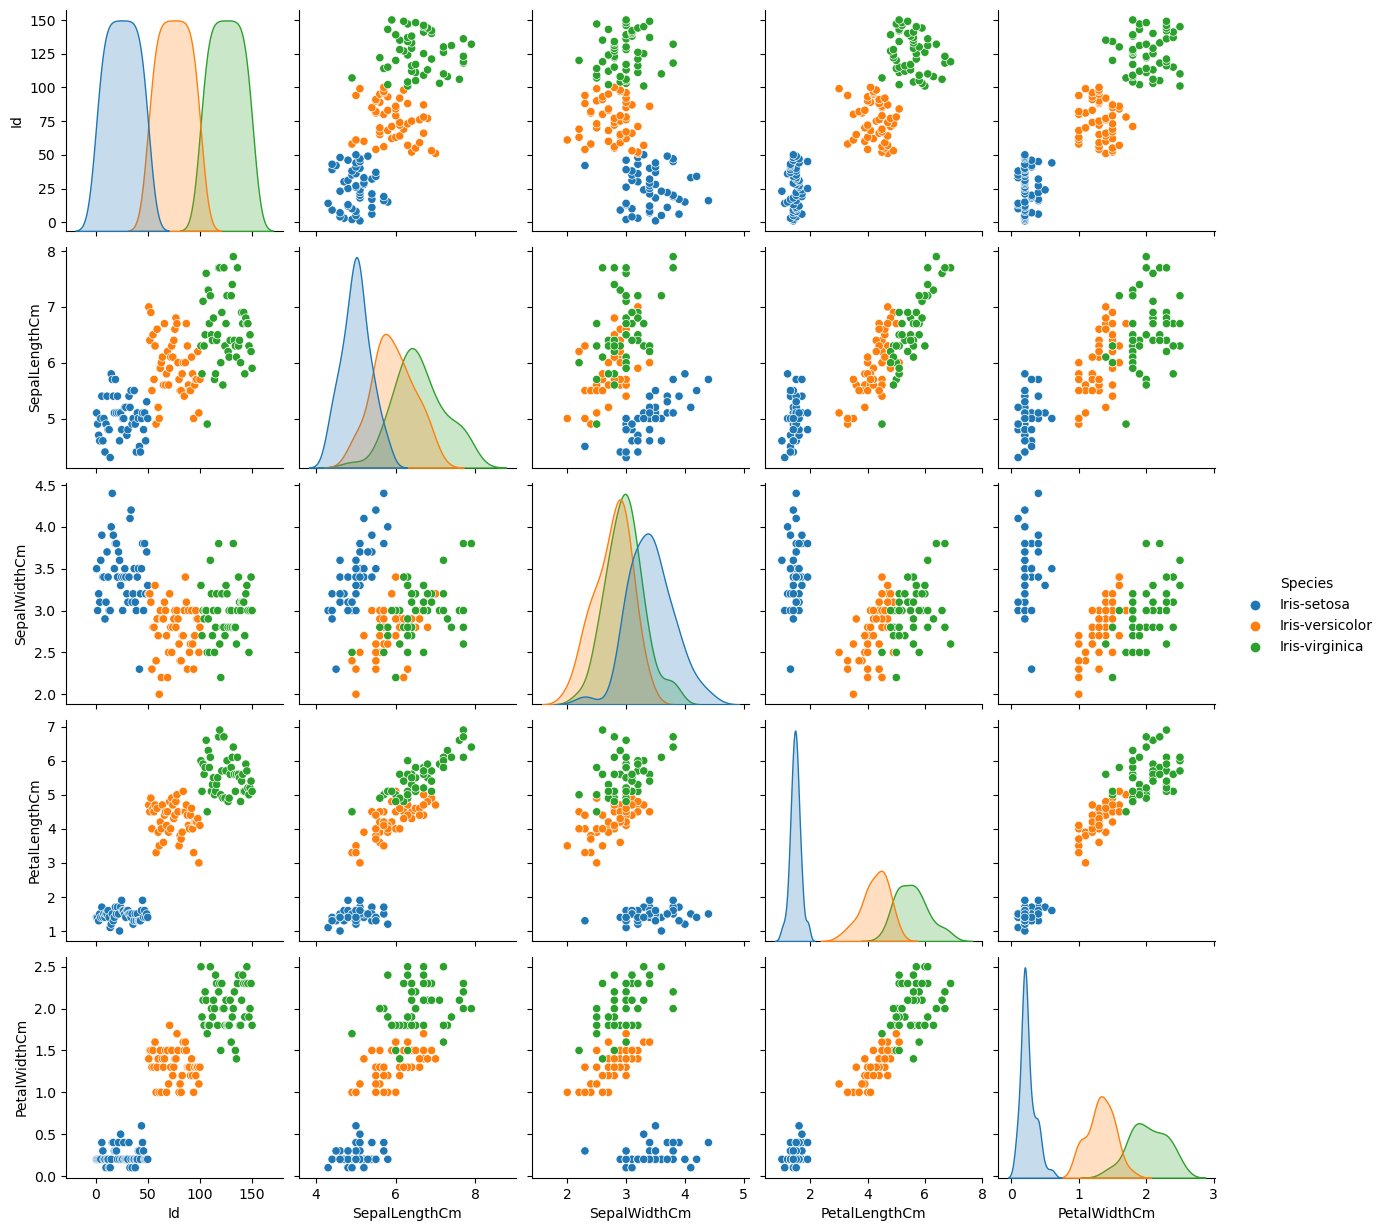

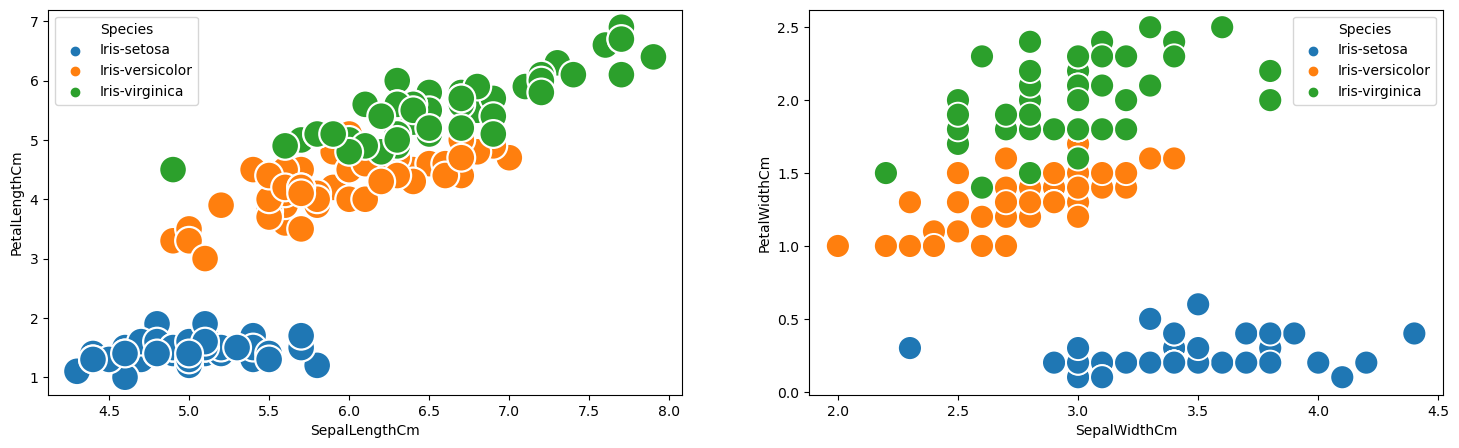

In [25]:
sb.pairplot(daart,hue='Species')
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(18,5))
sb.scatterplot(x='SepalLengthCm',y='PetalLengthCm',data=daart,hue='Species',ax=ax1,s=400,marker='o')
sb.scatterplot(x='SepalWidthCm',y='PetalWidthCm',data=daart,hue='Species',ax=ax2,s=300,marker='o')

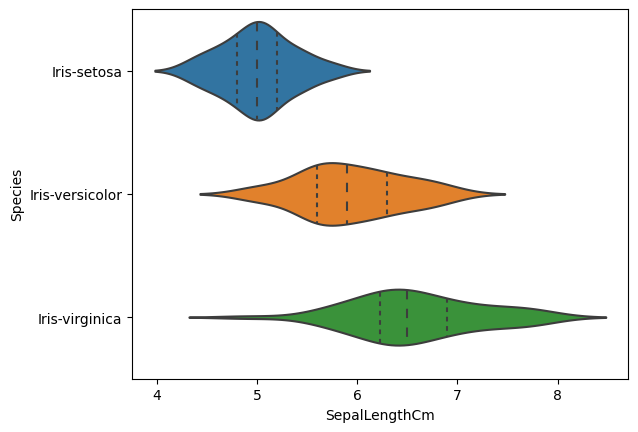

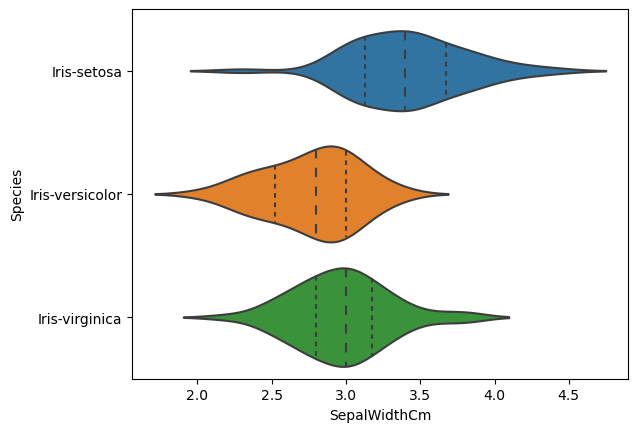

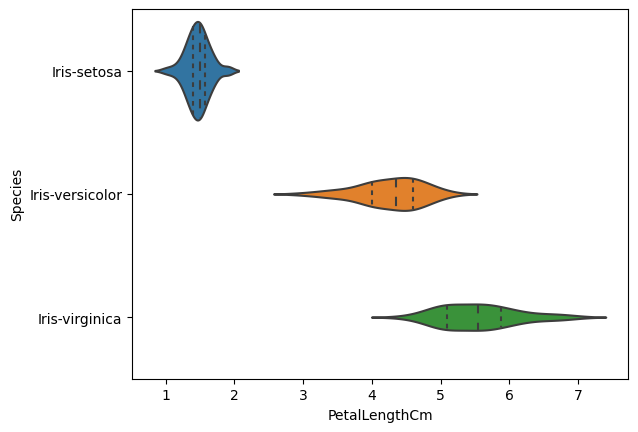

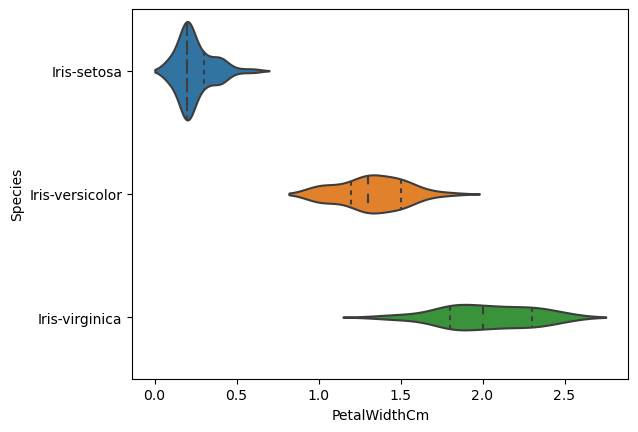

In [26]:
sb.violinplot(y='Species', x='SepalLengthCm', data=daart, inner='quartile')
plt.show()
sb.violinplot(y='Species', x='SepalWidthCm', data=daart, inner='quartile')
plt.show()
sb.violinplot(y='Species', x='PetalLengthCm', data=daart, inner='quartile')
plt.show()
sb.violinplot(y='Species', x='PetalWidthCm', data=daart, inner='quartile')
plt.show()

<Axes: ylabel='Species'>

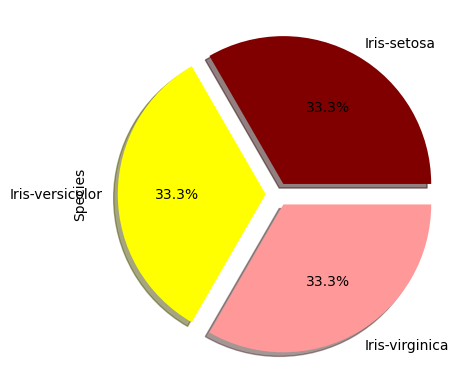

In [37]:
colors = ['#800000','#FFFF00','#FF9999']
daart['Species'].value_counts().plot(kind = 'pie',  autopct = '%0.1f%%', shadow = True,colors=colors, explode = [0.08,0.08,0.08])

# Heat Plot

C:\Users\saart\AppData\Local\Temp\ipykernel_12856\2831679056.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(daart.corr(), annot=True,cmap='CMRmap')


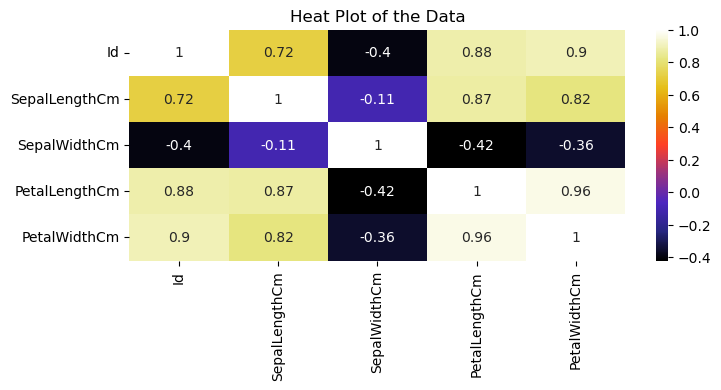

In [40]:
plt.figure(figsize=(8,3))
sb.heatmap(daart.corr(), annot=True,cmap='CMRmap')
plt.title('Heat Plot of the Data')
plt.show()

In [41]:
features = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
X = daart.loc[:, features].values 
y = daart.Species

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33,random_state=0)
DTC = DecisionTreeClassifier()
DTC.fit(X_train,y_train)

DecisionTreeClassifier()

[Text(0.5, 0.9166666666666666, 'petal length(cm) <= 2.35\ngini = 0.666\nsamples = 100\nvalue = [34, 31, 35]\nclass = Iris-virginica'),
 Text(0.4, 0.75, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]\nclass = Iris-setosa'),
 Text(0.6, 0.75, 'petal width(cm) <= 1.75\ngini = 0.498\nsamples = 66\nvalue = [0, 31, 35]\nclass = Iris-virginica'),
 Text(0.4, 0.5833333333333334, 'petal length(cm) <= 5.05\ngini = 0.165\nsamples = 33\nvalue = [0, 30, 3]\nclass = Iris-versicolor'),
 Text(0.3, 0.4166666666666667, 'sepal length(cm) <= 5.0\ngini = 0.062\nsamples = 31\nvalue = [0, 30, 1]\nclass = Iris-versicolor'),
 Text(0.2, 0.25, 'sepal width(cm) <= 2.45\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]\nclass = Iris-versicolor'),
 Text(0.1, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = Iris-versicolor'),
 Text(0.3, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Iris-virginica'),
 Text(0.4, 0.25, 'gini = 0.0\nsamples = 29\nvalue = [0, 29, 0]\nclass = Ir

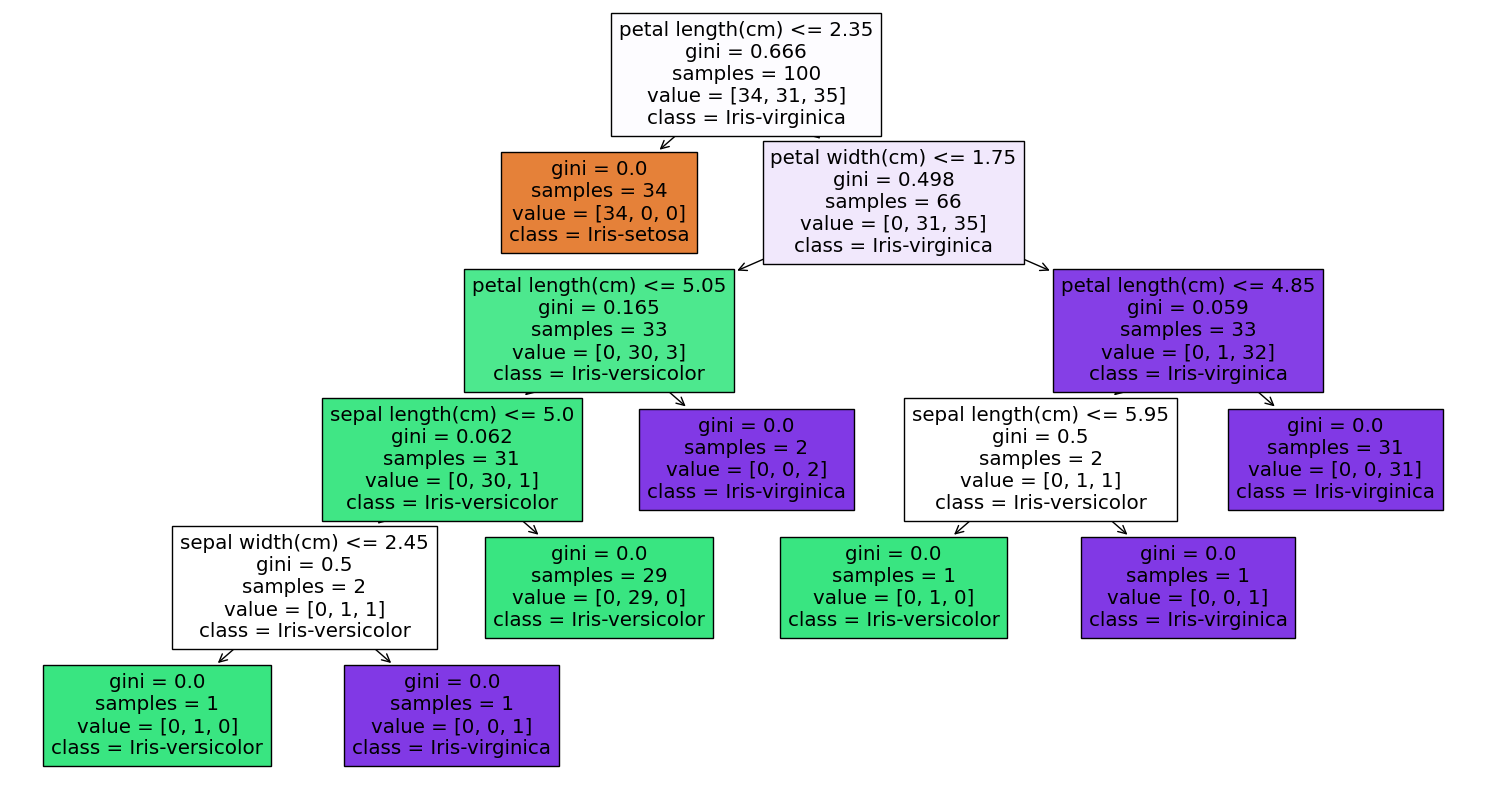

In [46]:
from sklearn import tree
feature_name =  ['sepal length(cm)','sepal width(cm)','petal length(cm)','petal width(cm)']
class_name= daart.Species.unique()
plt.figure(figsize=(19,10))
tree.plot_tree(DTC, filled = True, feature_names = feature_name, class_names= class_name)

In [47]:
y_pred = DTC.predict(X_test)
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica'],
      dtype=object)

In [48]:
score = accuracy_score(y_test,y_pred)
print(score)

0.96


In [50]:
def report(model):
    preds=model.predict(X_test)
    print(classification_report(preds,y_test))
    plot_confusion_matrix(model,X_test,y_test,cmap='nipy_spectral',colorbar=True)

In [51]:
print('Decision Tree Classifier')
report(DTC)
print(f'Accuracy: {round(score*100,2)}%')

Decision Tree Classifier
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.95      0.95      0.95        19
 Iris-virginica       0.93      0.93      0.93        15

       accuracy                           0.96        50
      macro avg       0.96      0.96      0.96        50
   weighted avg       0.96      0.96      0.96        50



NameError: name 'plot_confusion_matrix' is not defined

In [53]:
confusion_matrix(y_test, y_pred)
DTC.predict([[5, 3.6, 1.4 , 0.2]])
DTC.predict([[9, 3.1, 1.5 , 2.5]])
DTC.predict([[4, 3.7, 5.6, 1.2]])

array(['Iris-virginica'], dtype=object)